<a href="https://colab.research.google.com/github/emolinaperez/econometrics_mek/blob/main/Week%204/R/Week4_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Econometrics

The error term of our regression model is homoskedastic if the variance of the conditional distribution is constant for all observations in our sample.

If instead there is dependence of the conditional variance of on X, the error term is said to be heteroskedastic.


In [2]:
# load scales package for adjusting color opacities
if (!require(pacman)) install.packages("pacman")
library(pacman) ; p_load('scales','ggplot2')

Loading required package: pacman



Generate some heteroskedastic data:

In [3]:
# set seed for reproducibility
set.seed(123)

In [4]:
# set up vector of x coordinates
x <- rep(c(10, 15, 20, 25), each = 25)

In [5]:
# initialize vector of errors
e <- c()

In [6]:
# sample 100 errors such that the variance increases with x
e[1:25] <- rnorm(25, sd = 10)
e[26:50] <- rnorm(25, sd = 15)
e[51:75] <- rnorm(25, sd = 20)
e[76:100] <- rnorm(25, sd = 25)

In [7]:
# set up y
y <- 720 - 3.3 * x + e

In [8]:
# Estimate the model
mod <- lm(y ~ x)

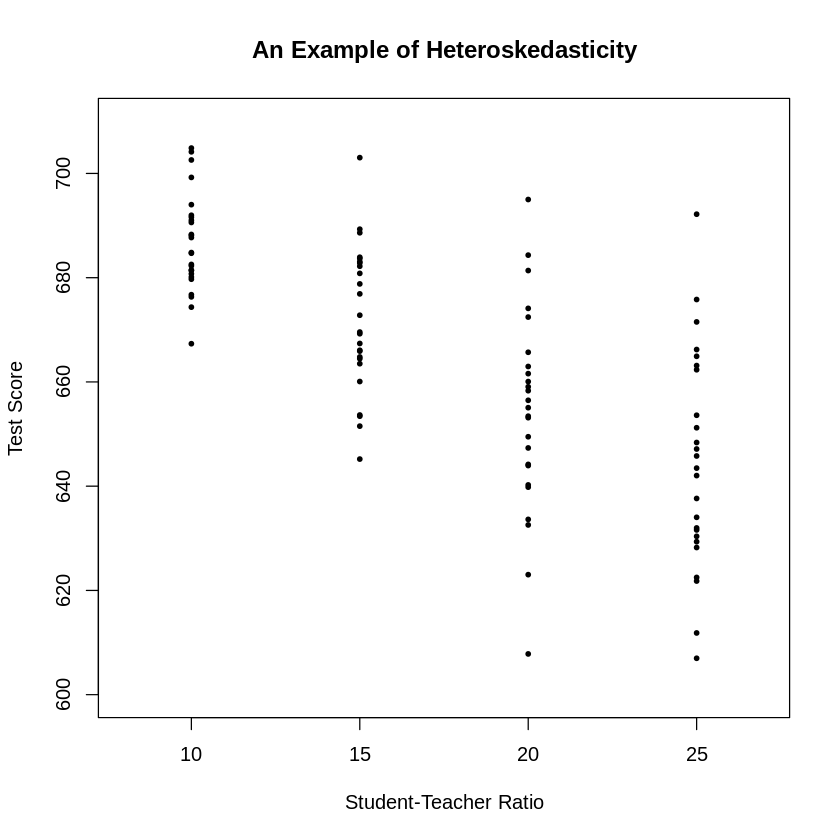

In [9]:
# Plot the data
plot(x = x,
     y = y,
     main = "An Example of Heteroskedasticity",
     xlab = "Student-Teacher Ratio",
     ylab = "Test Score",
     cex = 0.5,
     pch = 19,
     xlim = c(8, 27),
     ylim = c(600, 710))

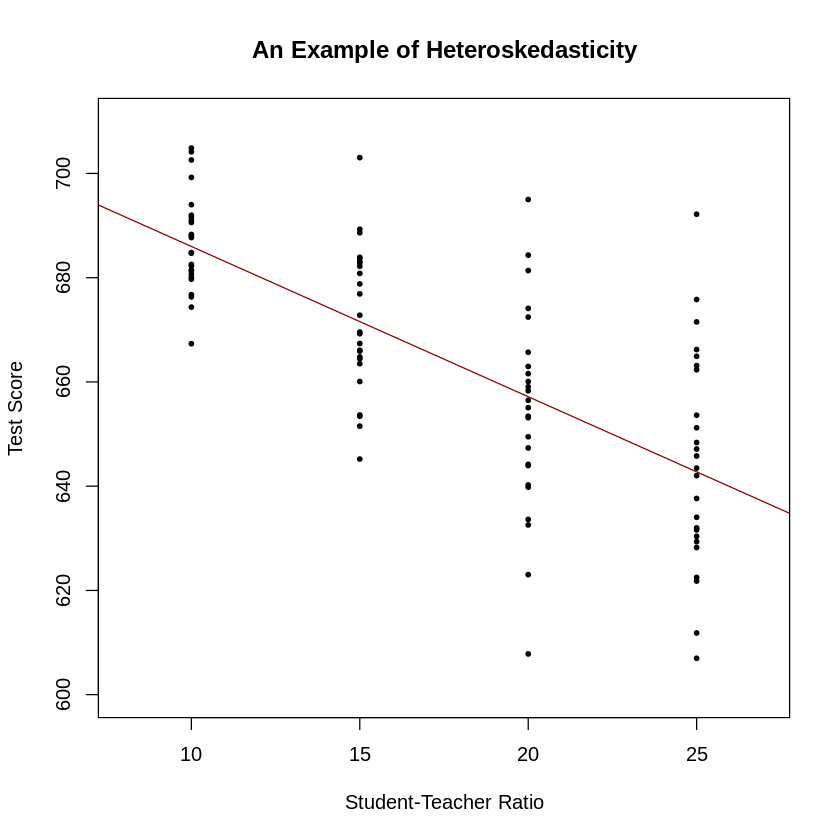

In [10]:
# Plot the data
plot(x = x,
     y = y,
     main = "An Example of Heteroskedasticity",
     xlab = "Student-Teacher Ratio",
     ylab = "Test Score",
     cex = 0.5,
     pch = 19,
     xlim = c(8, 27),
     ylim = c(600, 710))

# Add the regression line to the plot
abline(mod, col = "darkred")

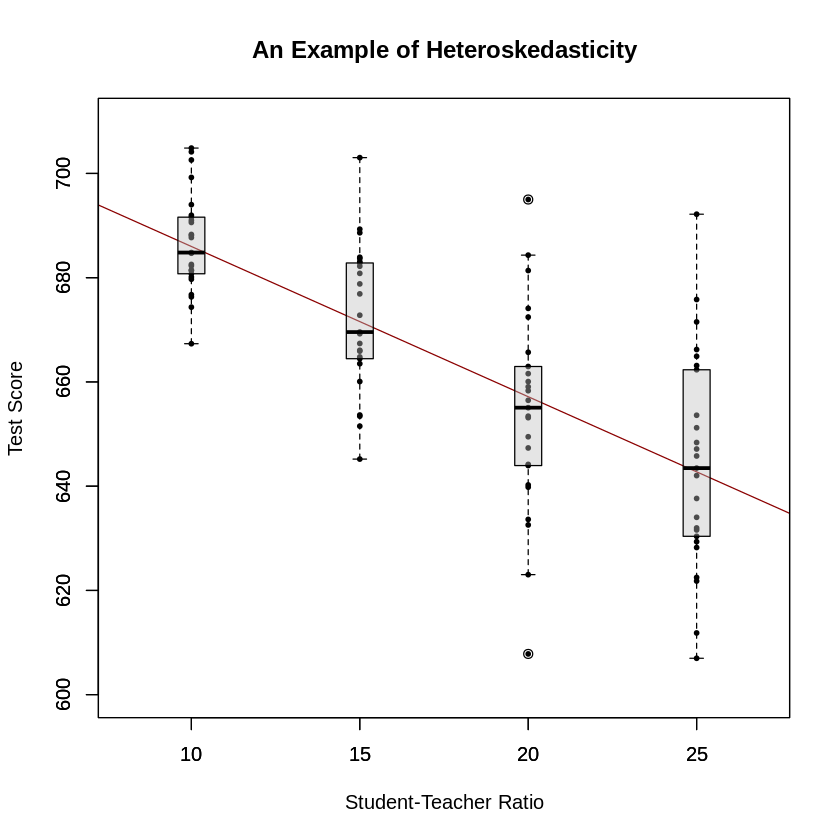

In [11]:
# Plot the data
plot(x = x,
     y = y,
     main = "An Example of Heteroskedasticity",
     xlab = "Student-Teacher Ratio",
     ylab = "Test Score",
     cex = 0.5,
     pch = 19,
     xlim = c(8, 27),
     ylim = c(600, 710))

# Add the regression line to the plot
abline(mod, col = "darkred")

# Add boxplots to the plot
boxplot(formula = y ~ x,
        add = TRUE,
        at = c(10, 15, 20, 25),
        col = alpha("gray", 0.4),
        border = "black")

For this artificial data it is clear that the conditional error variances differ.
Specifically, we observe that the variance in test scores (and therefore the variance of the errors committed) increases
with the student teacher ratio.

 How responsive are private transfers to income? Evidence from a laissez-faire economy

 Donald Cox, Bruce E. Hansen, Emmanuel Jimenez

In [12]:
#load data
Data.File<-"https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%204/data/CHJ2004.txt"
Data<-read.table(Data.File,header=TRUE)

In [13]:
#get summary statistics
dim(Data)

[1] 8684   28

In [14]:
summary(Data)

    tabroad         tdomestic         tinkind             tgifts       
 Min.   :     0   Min.   :     0   Min.   :     0.0   Min.   :    0.0  
 1st Qu.:     0   1st Qu.:     0   1st Qu.:     0.0   1st Qu.:    0.0  
 Median :     0   Median :     0   Median :   409.5   Median :    0.0  
 Mean   :  4912   Mean   :  1068   Mean   :  1729.3   Mean   :  268.8  
 3rd Qu.:     0   3rd Qu.:   500   3rd Qu.:  1500.0   3rd Qu.:  140.0  
 Max.   :512000   Max.   :110000   Max.   :126610.0   Max.   :57200.0  
     income            wage        entrepreneourial     rental        
 Min.   :     0   Min.   :     0   Min.   :     0   Min.   :     0.0  
 1st Qu.: 19960   1st Qu.:   415   1st Qu.:     0   1st Qu.:     0.0  
 Median : 33350   Median : 19295   Median :     0   Median :     0.0  
 Mean   : 45229   Mean   : 26300   Mean   : 11792   Mean   :   657.6  
 3rd Qu.: 57309   3rd Qu.: 37200   3rd Qu.: 14442   3rd Qu.:     0.0  
 Max.   :284310   Max.   :258438   Max.   :284160   Max.   :182000.0  

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


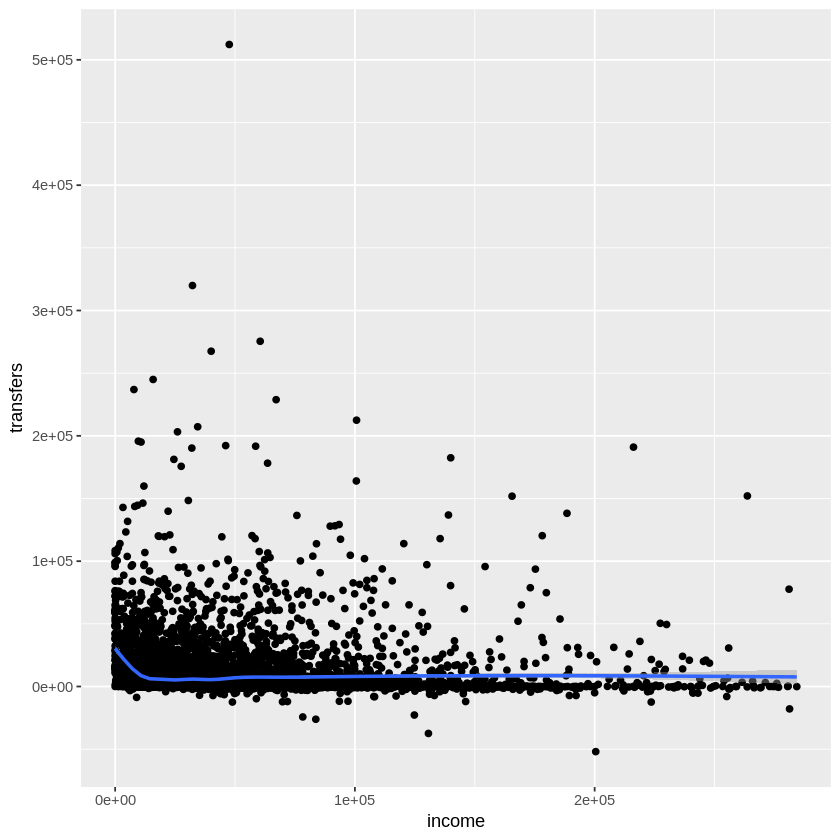

In [16]:
#how does transfer vary per income level
ggplot(Data,aes(x=income,y=transfers))+geom_point()+geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 2164 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 2164 rows containing missing values or values outside the scale range
(`geom_point()`).”


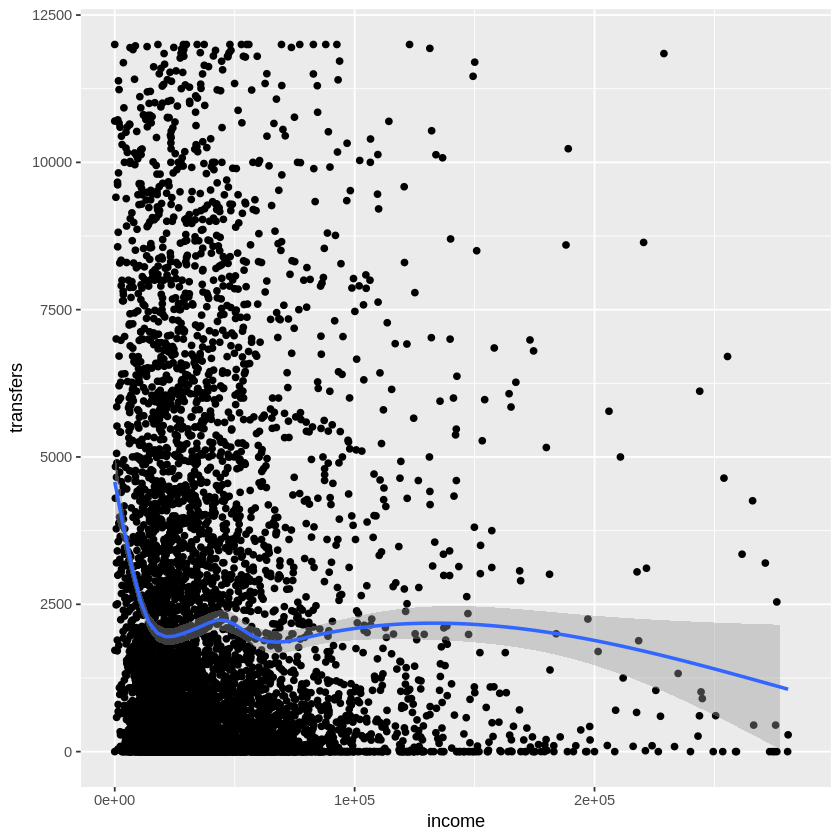

In [17]:
#lets look into things a bit dipper
ggplot(Data,aes(x=income,y=transfers))+geom_point()+geom_smooth()+ylim(0, 12000)


In [19]:
#let's run the first model
model1<-lm(transfers~income, data=Data)
summary(model1)


Call:
lm(formula = transfers ~ income, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-58334  -7343  -6396  -2128 504836 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.751e+03  3.226e+02  24.026   <2e-16 ***
income      -6.869e-03  5.345e-03  -1.285    0.199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 19900 on 8682 degrees of freedom
Multiple R-squared:  0.0001902,	Adjusted R-squared:  7.503e-05 
F-statistic: 1.652 on 1 and 8682 DF,  p-value: 0.1988


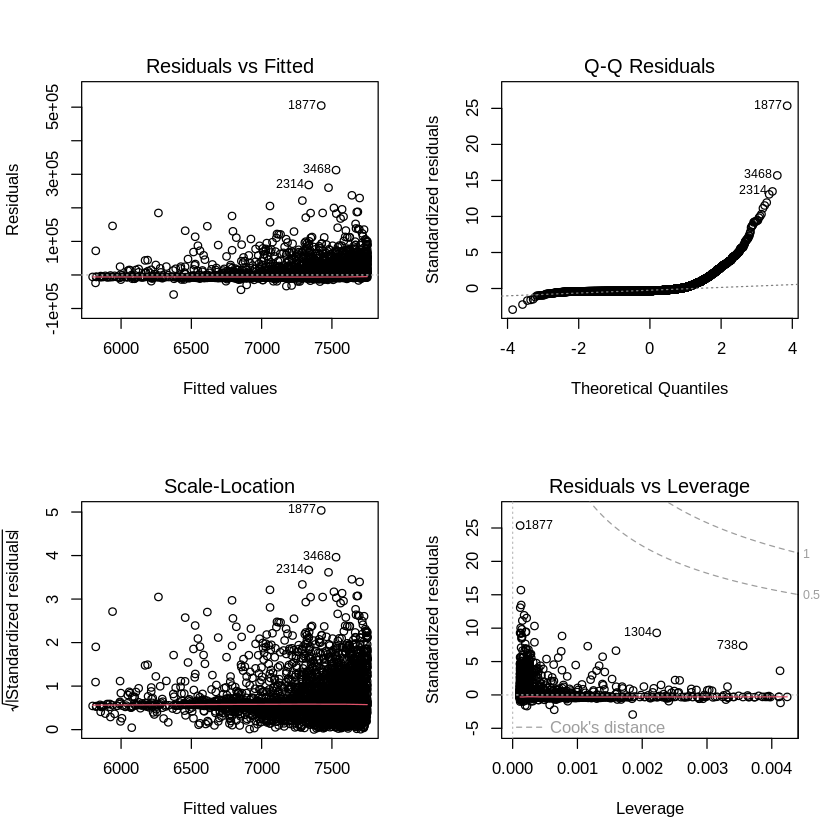

In [20]:
#regression diagnostics
par(mfrow=c(2,2))
plot(model1)

In [21]:
#test assumptions in greater detail
test<- data.frame(yhat = fitted(model1),res = residuals(model1),income=Data$income)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


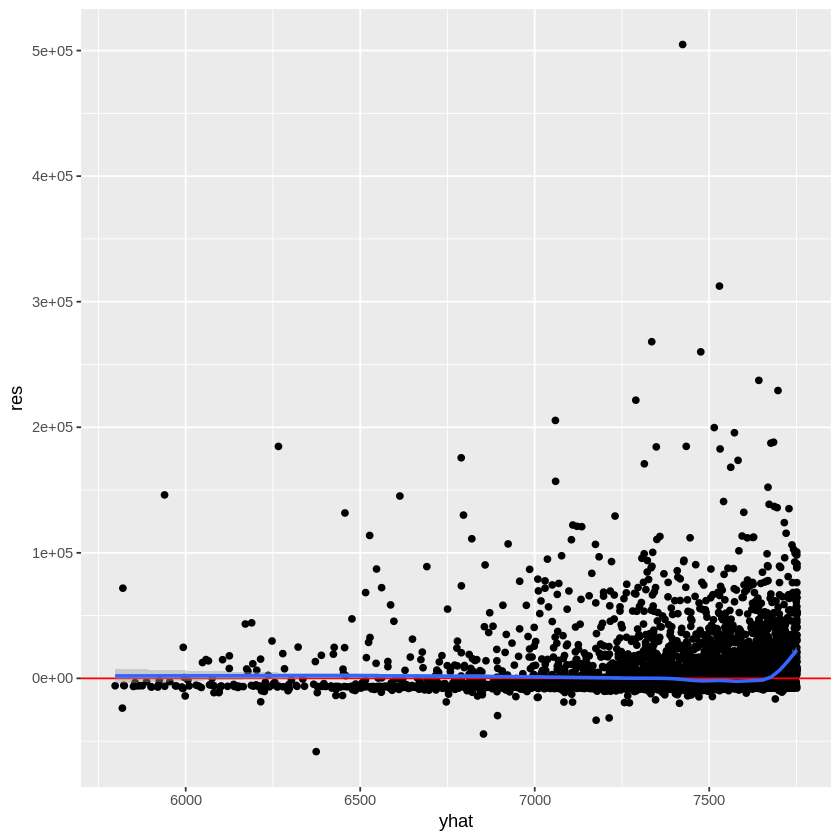

In [22]:
# does residuals' conditional mean is zero?
ggplot(test, aes(yhat, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


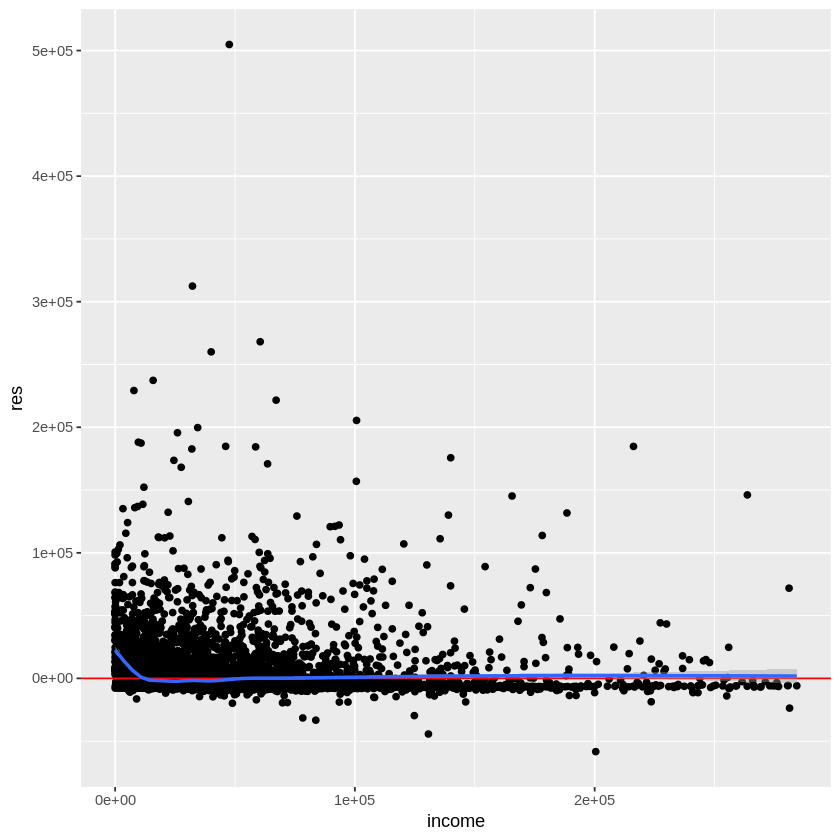

In [23]:
#does resifuals are correlated with the predictor
ggplot(test, aes(income, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 6980 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 6980 rows containing missing values or values outside the scale range
(`geom_point()`).”


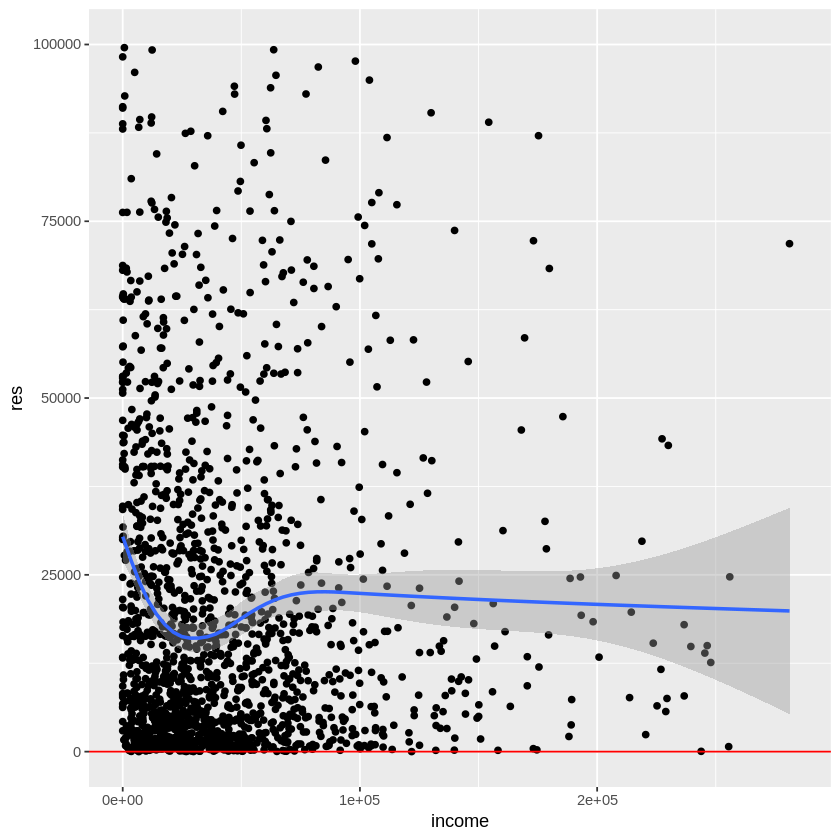

In [24]:
ggplot(test, aes(income, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth() + ylim(0, 100000)

In [25]:
#we should add controls to our regression
colnames(Data)

[1] "tabroad"          "tdomestic"        "tinkind"          "tgifts"          
 [5] "income"           "wage"             "entrepreneourial" "rental"          
 [9] "interest"         "pension"          "dividend"         "primary"         
[13] "somesecondary"    "secondary"        "someuniversity"   "university"      
[17] "age"              "female"           "married"          "child1"          
[21] "child7"           "child15"          "size"             "bothwork"        
[25] "notemployed"      "marriedf"         "region"           "transfers"

In [26]:
rms<-c("tabroad","tdomestic","tinkind","tgifts","income","wage","entrepreneourial","rental","interest","pension","dividend","transfers")
dummies<-c("region") #with more than 2 classes
Treatment<-"income"
Ws <- subset(colnames(Data),!(colnames(Data)%in%c(rms,dummies)))

In [40]:
#create model with controls
formula.model2 <- as.formula(paste("transfers","~",paste(c(Treatment,Ws),collapse="+"),paste0("+ factor(",dummies,")"),sep=""))
formula.model2

transfers ~ income + primary + somesecondary + secondary + someuniversity + 
    university + age + female + married + child1 + child7 + child15 + 
    size + bothwork + notemployed + marriedf + factor(region)

In [28]:
#second run regression
model2<-lm(formula.model2,data=Data)
summary(model2)


Call:
lm(formula = formula.model2, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-52495  -5808  -2233   1229 470127 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.828e+03  1.351e+03   2.833 0.004625 ** 
income           -2.383e-02  5.705e-03  -4.176 2.99e-05 ***
primary           3.668e+02  6.348e+02   0.578 0.563403    
somesecondary     1.253e+01  7.184e+02   0.017 0.986081    
secondary         2.588e+03  6.457e+02   4.009 6.16e-05 ***
someuniversity    5.730e+03  7.195e+02   7.963 1.88e-15 ***
university        6.355e+03  7.463e+02   8.515  < 2e-16 ***
age              -2.571e+01  1.781e+01  -1.444 0.148776    
female            1.111e+03  1.007e+03   1.103 0.269881    
married          -1.015e+02  9.101e+02  -0.112 0.911182    
child1           -6.768e+02  5.979e+02  -1.132 0.257720    
child7           -9.822e+02  2.404e+02  -4.086 4.43e-05 ***
child15          -2.726e+02  2.053e+02  -1.328 0.184284    
size        

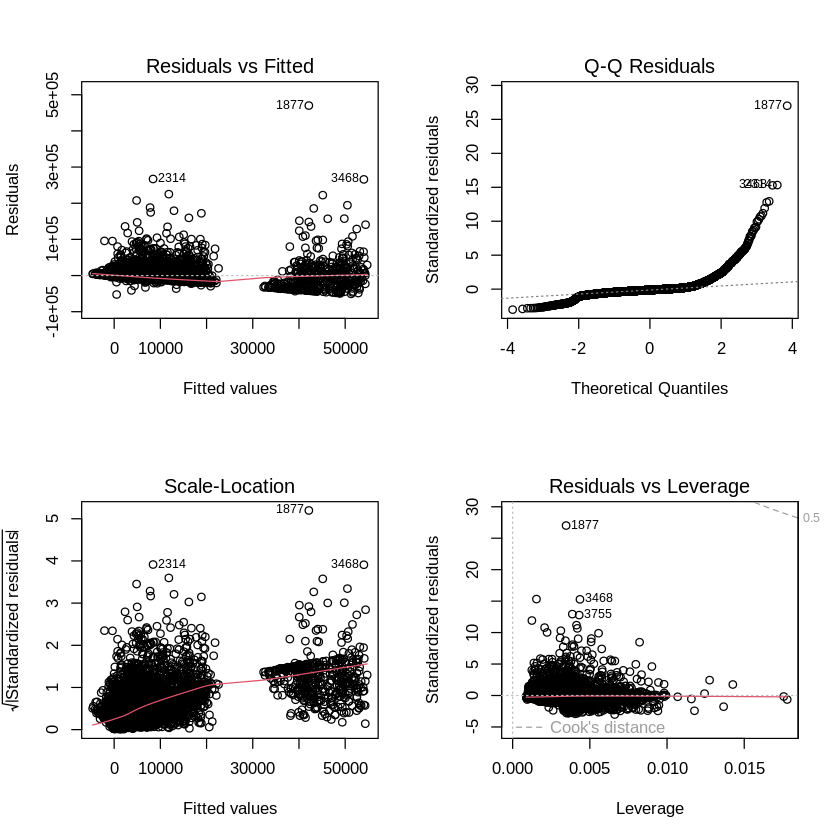

In [30]:
#get diagnostics
par(mfrow=c(2,2))
plot(model2)

In [31]:
#slection biass
sbias<-lm(income  ~ primary + somesecondary + secondary + someuniversity +
            university + age + female + married + child1 + child7 + child15 +
            size + bothwork + notemployed + marriedf,data=Data)
summary(sbias)


Call:
lm(formula = income ~ primary + somesecondary + secondary + someuniversity + 
    university + age + female + married + child1 + child7 + child15 + 
    size + bothwork + notemployed + marriedf, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-103991  -18164   -5456    9389  241971 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9966.32    2515.29  -3.962 7.48e-05 ***
primary          6132.34    1210.63   5.065 4.16e-07 ***
somesecondary    9871.39    1368.52   7.213 5.93e-13 ***
secondary       17608.10    1205.21  14.610  < 2e-16 ***
someuniversity  27057.82    1341.75  20.166  < 2e-16 ***
university      50080.17    1321.53  37.896  < 2e-16 ***
age               213.88      33.74   6.340 2.41e-10 ***
female           3417.26    1934.05   1.767   0.0773 .  
married           590.63    1749.10   0.338   0.7356    
child1          -7940.39    1145.64  -6.931 4.48e-12 ***
child7          -7191.04     453.78 -15.847  < 2e

In [32]:
#test assumptions in greater detail
test<- data.frame(yhat = fitted(model1),res = residuals(model1),income=Data$income)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


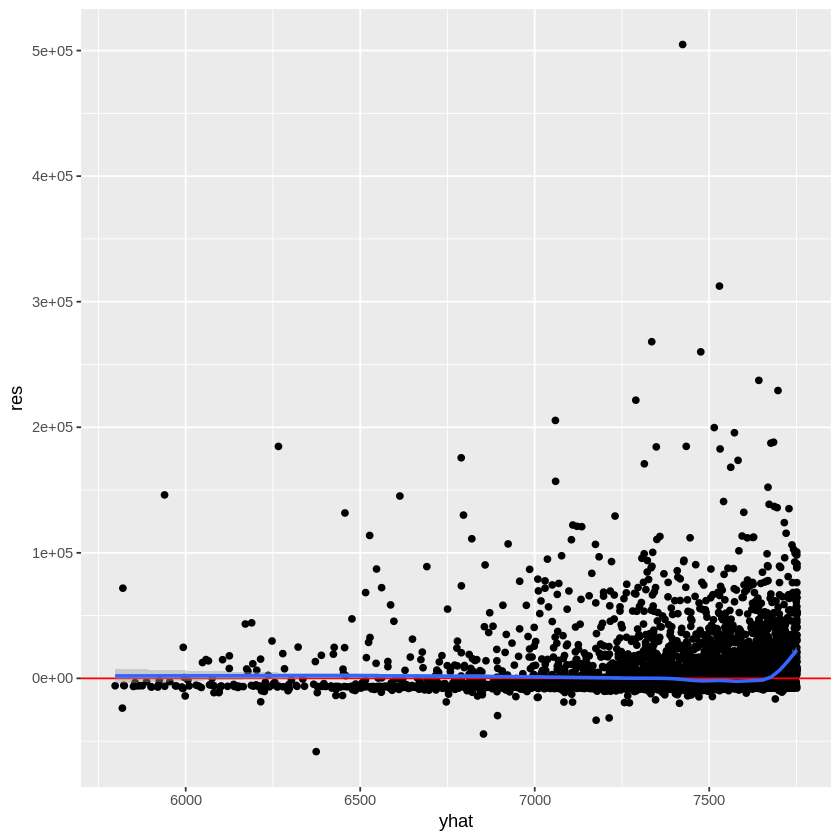

In [33]:
# does residuals' conditional mean is zero?
ggplot(test, aes(yhat, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


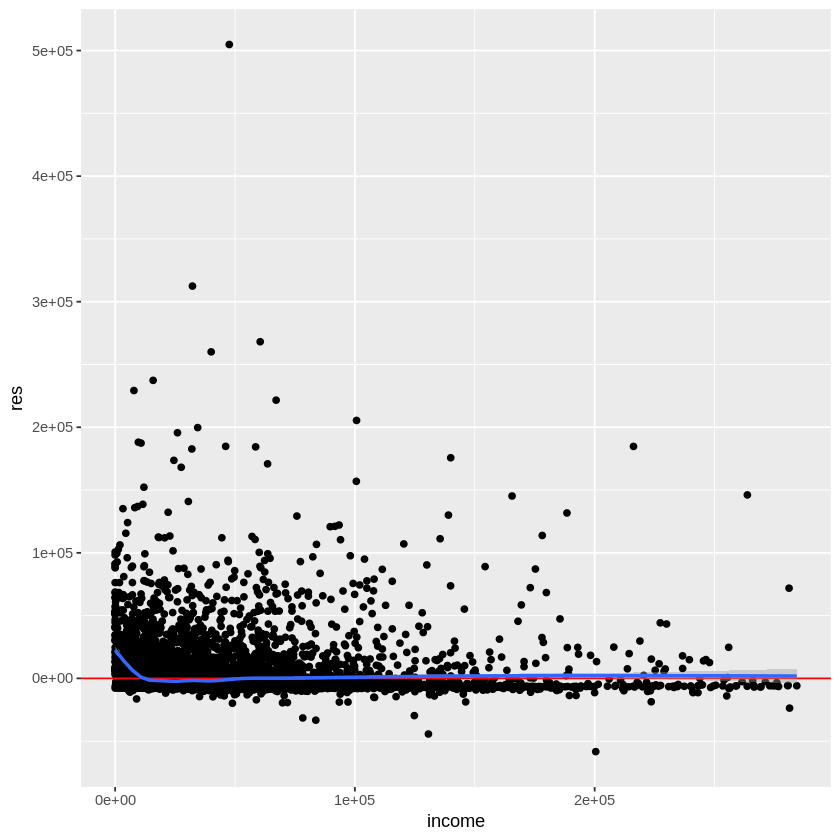

In [34]:
#does resifuals are correlated with the predictor
ggplot(test, aes(income, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth()

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 6980 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 6980 rows containing missing values or values outside the scale range
(`geom_point()`).”


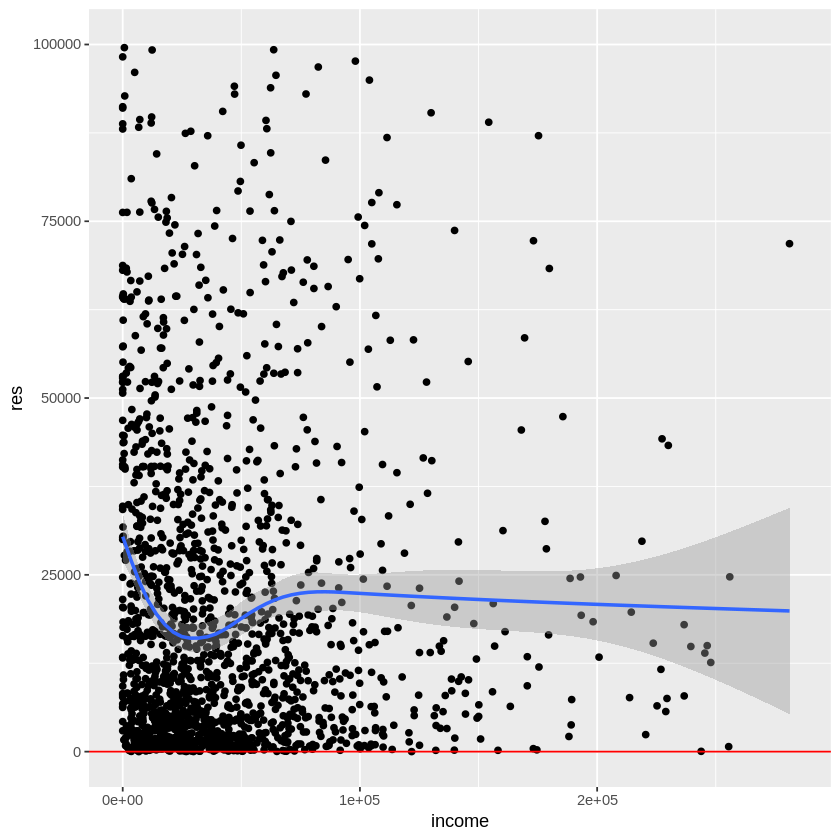

In [35]:
ggplot(test, aes(income, res)) + geom_point() + geom_hline(yintercept = 0, color = "red") + geom_smooth() + ylim(0, 100000)

In [36]:
#we should add controls to our regression
colnames(Data)

[1] "tabroad"          "tdomestic"        "tinkind"          "tgifts"          
 [5] "income"           "wage"             "entrepreneourial" "rental"          
 [9] "interest"         "pension"          "dividend"         "primary"         
[13] "somesecondary"    "secondary"        "someuniversity"   "university"      
[17] "age"              "female"           "married"          "child1"          
[21] "child7"           "child15"          "size"             "bothwork"        
[25] "notemployed"      "marriedf"         "region"           "transfers"

In [37]:
rms<-c("tabroad","tdomestic","tinkind","tgifts","income","wage","entrepreneourial","rental","interest","pension","dividend","transfers")
dummies<-c("region") #with more than 2 classes
Treatment<-"income"
Ws <- subset(colnames(Data),!(colnames(Data)%in%c(rms,dummies)))

In [39]:
#create model with controls
formula.model2 <- as.formula(paste("transfers","~",paste(c(Treatment,Ws),collapse="+"),paste0("+ factor(",dummies,")"),sep=""))
formula.model2

transfers ~ income + primary + somesecondary + secondary + someuniversity + 
    university + age + female + married + child1 + child7 + child15 + 
    size + bothwork + notemployed + marriedf + factor(region)

In [41]:
#second run regression
model2<-lm(formula.model2,data=Data)
summary(model2)


Call:
lm(formula = formula.model2, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-52495  -5808  -2233   1229 470127 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.828e+03  1.351e+03   2.833 0.004625 ** 
income           -2.383e-02  5.705e-03  -4.176 2.99e-05 ***
primary           3.668e+02  6.348e+02   0.578 0.563403    
somesecondary     1.253e+01  7.184e+02   0.017 0.986081    
secondary         2.588e+03  6.457e+02   4.009 6.16e-05 ***
someuniversity    5.730e+03  7.195e+02   7.963 1.88e-15 ***
university        6.355e+03  7.463e+02   8.515  < 2e-16 ***
age              -2.571e+01  1.781e+01  -1.444 0.148776    
female            1.111e+03  1.007e+03   1.103 0.269881    
married          -1.015e+02  9.101e+02  -0.112 0.911182    
child1           -6.768e+02  5.979e+02  -1.132 0.257720    
child7           -9.822e+02  2.404e+02  -4.086 4.43e-05 ***
child15          -2.726e+02  2.053e+02  -1.328 0.184284    
size        

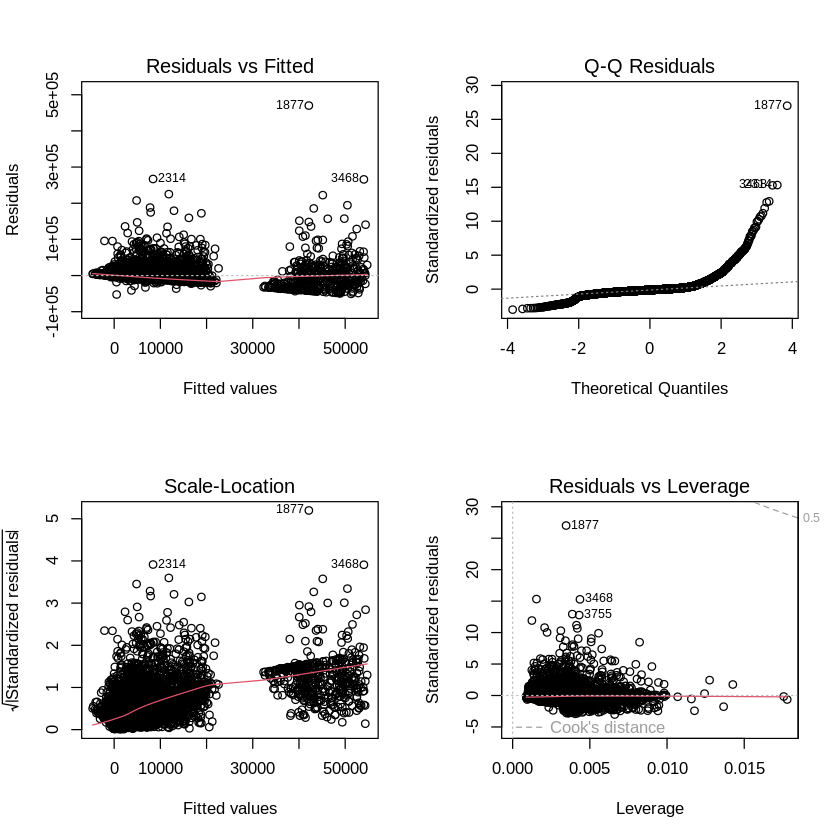

In [43]:
#get diagnostics
par(mfrow=c(2,2))
plot(model2)

In [44]:
#slection biass
sbias<-lm(income  ~ primary + somesecondary + secondary + someuniversity +
            university + age + female + married + child1 + child7 + child15 +
            size + bothwork + notemployed + marriedf,data=Data)
summary(sbias)


Call:
lm(formula = income ~ primary + somesecondary + secondary + someuniversity + 
    university + age + female + married + child1 + child7 + child15 + 
    size + bothwork + notemployed + marriedf, data = Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-103991  -18164   -5456    9389  241971 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9966.32    2515.29  -3.962 7.48e-05 ***
primary          6132.34    1210.63   5.065 4.16e-07 ***
somesecondary    9871.39    1368.52   7.213 5.93e-13 ***
secondary       17608.10    1205.21  14.610  < 2e-16 ***
someuniversity  27057.82    1341.75  20.166  < 2e-16 ***
university      50080.17    1321.53  37.896  < 2e-16 ***
age               213.88      33.74   6.340 2.41e-10 ***
female           3417.26    1934.05   1.767   0.0773 .  
married           590.63    1749.10   0.338   0.7356    
child1          -7940.39    1145.64  -6.931 4.48e-12 ***
child7          -7191.04     453.78 -15.847  < 2e

In [45]:
#how strongly correlated are these controls with treatment and residuals
Data$yhat <- fitted(model2)
Data$res <- residuals(model2)
cortable<-cor(Data[,c(Treatment,Ws,"yhat","res")])
apply(cortable,c(1,2),function(x){ifelse(abs(x)>0.05,1,0)})
mean(Data$res)

,income,primary,somesecondary,secondary,someuniversity,university,age,female,married,child1,child7,child15,size,bothwork,notemployed,marriedf,yhat,res
income,1,1,1,0,1,1,1,1,1,0,1,0,1,1,1,1,0,0
primary,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,1,0
somesecondary,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
secondary,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
someuniversity,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0
university,1,1,1,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0
age,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,1,0,0
female,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
married,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
child1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,0,0


[1] 7.763174e-15

Llets tabulate results accross classes

In [46]:
#we can create a dummy for income
Data$income_level <- as.character(
  cut(Data$income,
      breaks=c(0,as.numeric(quantile(Data$income,0.25)),as.numeric(quantile(Data$income,0.50)),as.numeric(quantile(Data$income,0.75)),max(Data$income)),
      labels= c("Q25","Q50","Q75",">Q75"))
)

In [47]:
#tabulate average transfers per income level
aggregate(list(mean_transfers=Data$transfers),list(income_level=Data$income_level), mean)

income_level,mean_transfers
<chr>,<dbl>
>Q75,8096.819
Q25,9523.977
Q50,5549.517
Q75,5854.212


Now run the regression per income level

Below Q25 lowest income

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


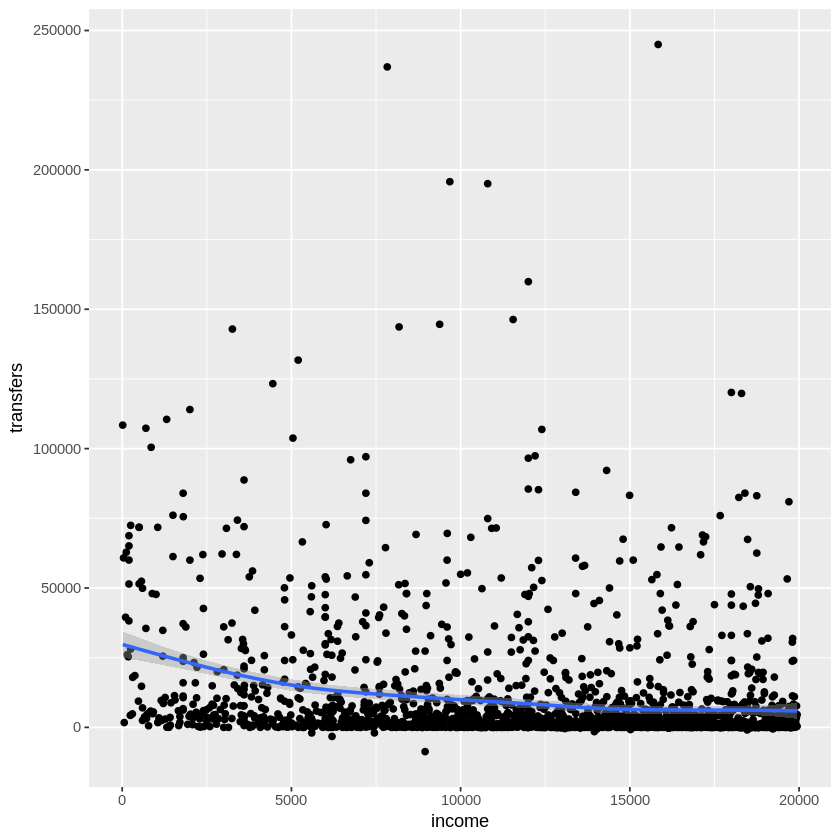

In [54]:
data_section <- subset(Data,income_level=="Q25")
ggplot(data_section,aes(x=income,y=transfers))+geom_point()+geom_smooth()

In [55]:
model3<-lm(formula.model2,data=data_section)
summary(model3)


Call:
lm(formula = formula.model2, data = data_section)

Residuals:
   Min     1Q Median     3Q    Max 
-58069  -5744   -932   2463 216824 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      11345.6033  2451.5875   4.628 3.92e-06 ***
income              -0.3884     0.0765  -5.078 4.16e-07 ***
primary            869.6185   986.0982   0.882 0.377944    
somesecondary     1118.7056  1132.0863   0.988 0.323178    
secondary         2333.4461  1133.8096   2.058 0.039708 *  
someuniversity    8681.9956  1368.6386   6.344 2.74e-10 ***
university       10252.9806  1848.7916   5.546 3.30e-08 ***
age                -60.4768    28.8262  -2.098 0.036026 *  
female            1198.7163  1527.3668   0.785 0.432645    
married            554.7003  1437.0892   0.386 0.699544    
child1           -2209.9220  1148.0605  -1.925 0.054375 .  
child7           -1296.6867   504.4524  -2.570 0.010224 *  
child15             -0.1090   459.4007   0.000 0.999811    
size

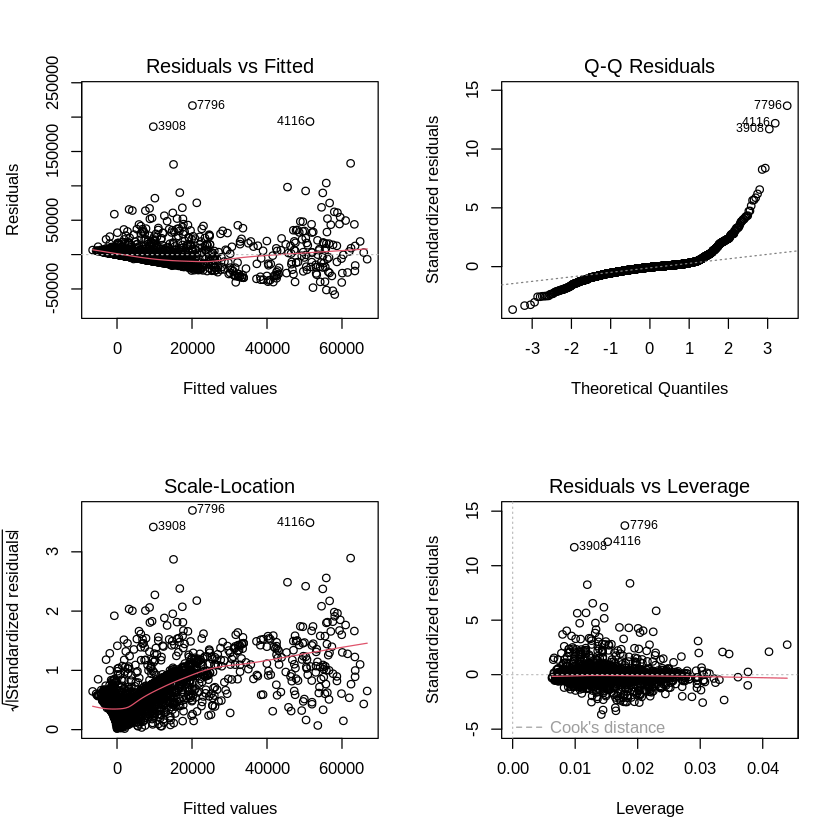

In [52]:
par(mfrow=c(2,2))
plot(model3)

Q25-Q50

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


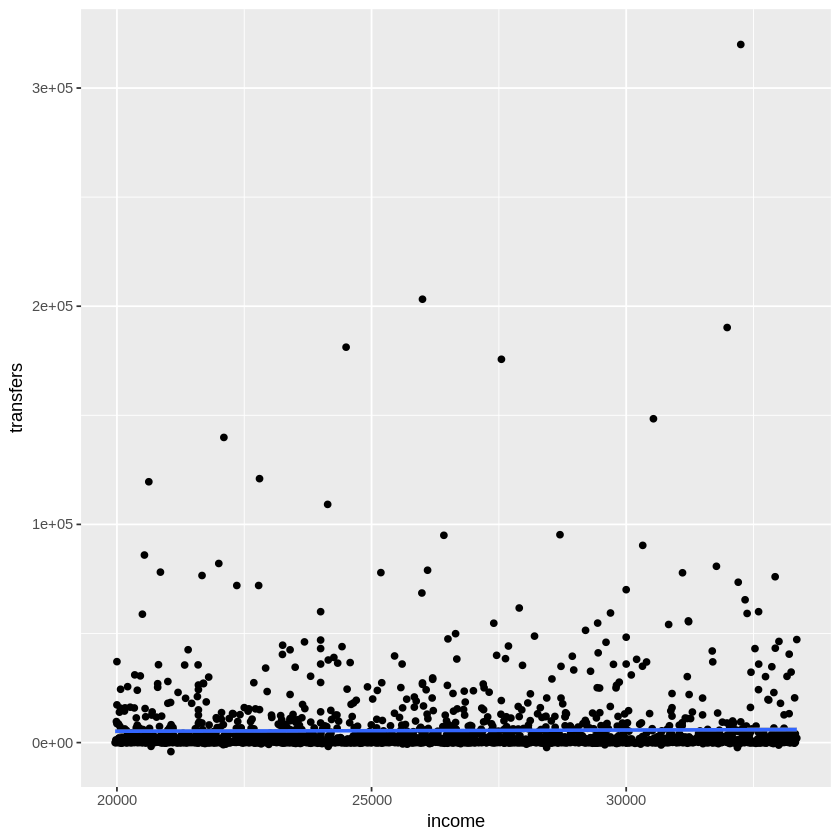

In [56]:
data_section <- subset(Data,income_level=="Q50")
ggplot(data_section,aes(x=income,y=transfers))+geom_point()+geom_smooth()

In [57]:
model4<-lm(formula.model2,data=data_section)
summary(model4)


Call:
lm(formula = formula.model2, data = data_section)

Residuals:
   Min     1Q Median     3Q    Max 
-42428  -4396  -1603   1215 272219 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -5.148e+02  3.133e+03  -0.164 0.869510    
income            3.768e-02  8.228e-02   0.458 0.646997    
primary           1.236e+03  9.715e+02   1.273 0.203282    
somesecondary     5.508e+02  1.148e+03   0.480 0.631360    
secondary         3.119e+03  1.039e+03   3.001 0.002723 ** 
someuniversity    5.599e+03  1.217e+03   4.602 4.43e-06 ***
university        8.642e+03  1.518e+03   5.695 1.41e-08 ***
age               2.929e+01  3.244e+01   0.903 0.366624    
female           -3.908e+01  1.800e+03  -0.022 0.982676    
married          -1.147e+02  1.584e+03  -0.072 0.942272    
child1           -2.072e+03  9.938e+02  -2.085 0.037159 *  
child7           -7.310e+02  3.997e+02  -1.829 0.067560 .  
child15          -1.571e+02  3.814e+02  -0.412 0.680392    
size

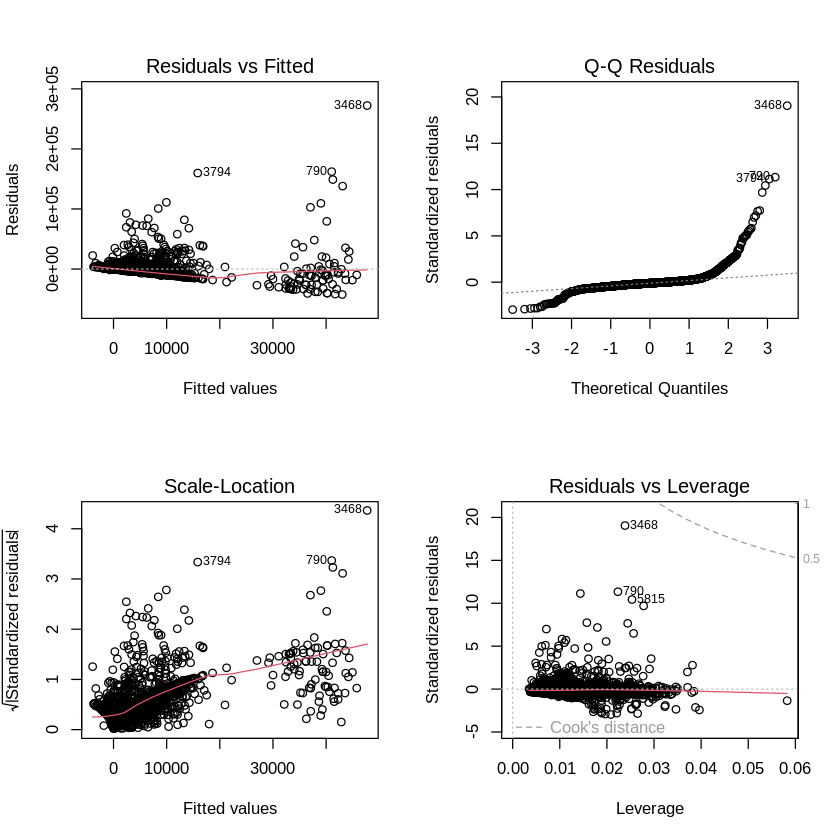

In [58]:
par(mfrow=c(2,2))
plot(model4)

Q50-Q75

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


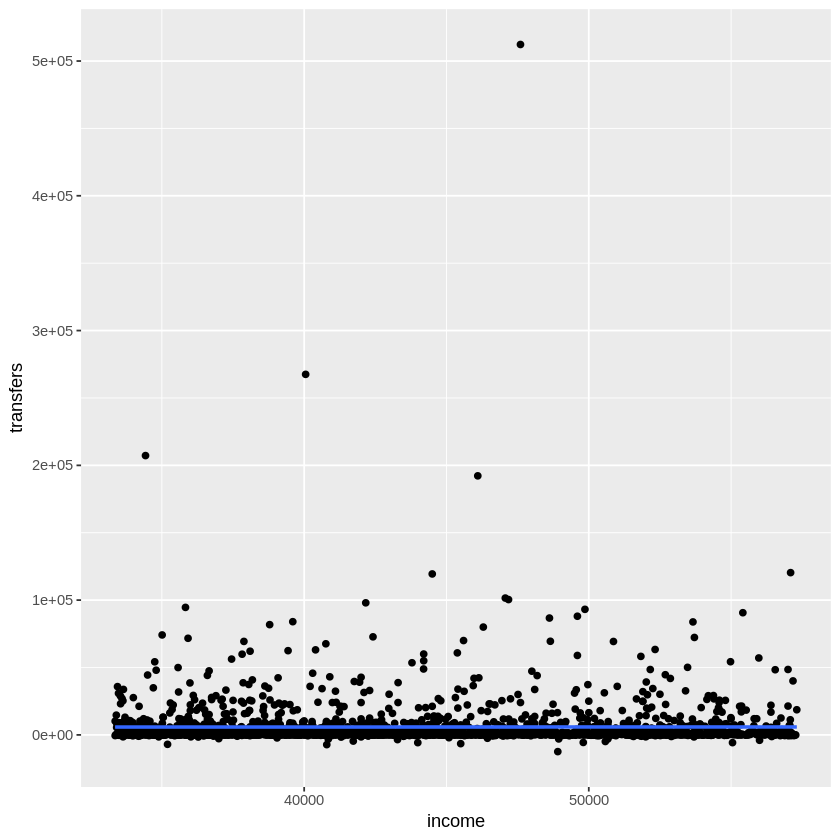

In [59]:
data_section <- subset(Data,income_level=="Q75")
ggplot(data_section,aes(x=income,y=transfers))+geom_point()+geom_smooth()

In [60]:
model5<-lm(formula.model2,data=data_section)
summary(model5)


Call:
lm(formula = formula.model2, data = data_section)

Residuals:
   Min     1Q Median     3Q    Max 
-39912  -4975  -2264    865 473426 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.482e+03  3.649e+03   0.680 0.496444    
income           -5.016e-03  5.524e-02  -0.091 0.927659    
primary          -1.275e+03  1.379e+03  -0.925 0.355192    
somesecondary    -9.194e+02  1.503e+03  -0.612 0.540811    
secondary         1.784e+03  1.336e+03   1.335 0.182022    
someuniversity    2.552e+03  1.494e+03   1.708 0.087757 .  
university        3.620e+03  1.517e+03   2.386 0.017119 *  
age              -1.129e+01  3.877e+01  -0.291 0.770929    
female            1.019e+03  2.152e+03   0.473 0.635974    
married           7.245e+02  1.930e+03   0.375 0.707375    
child1            5.863e+02  1.132e+03   0.518 0.604681    
child7           -9.363e+02  4.794e+02  -1.953 0.050936 .  
child15          -7.613e+02  3.996e+02  -1.905 0.056874 .  
size

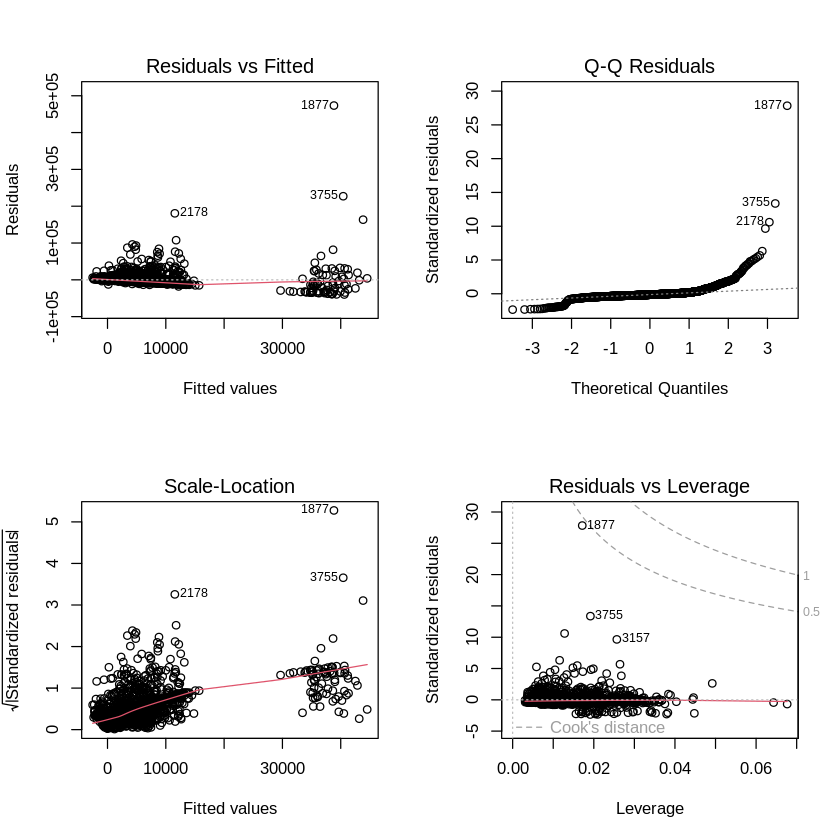

In [61]:
par(mfrow=c(2,2))
plot(model5)

 '>Q75

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


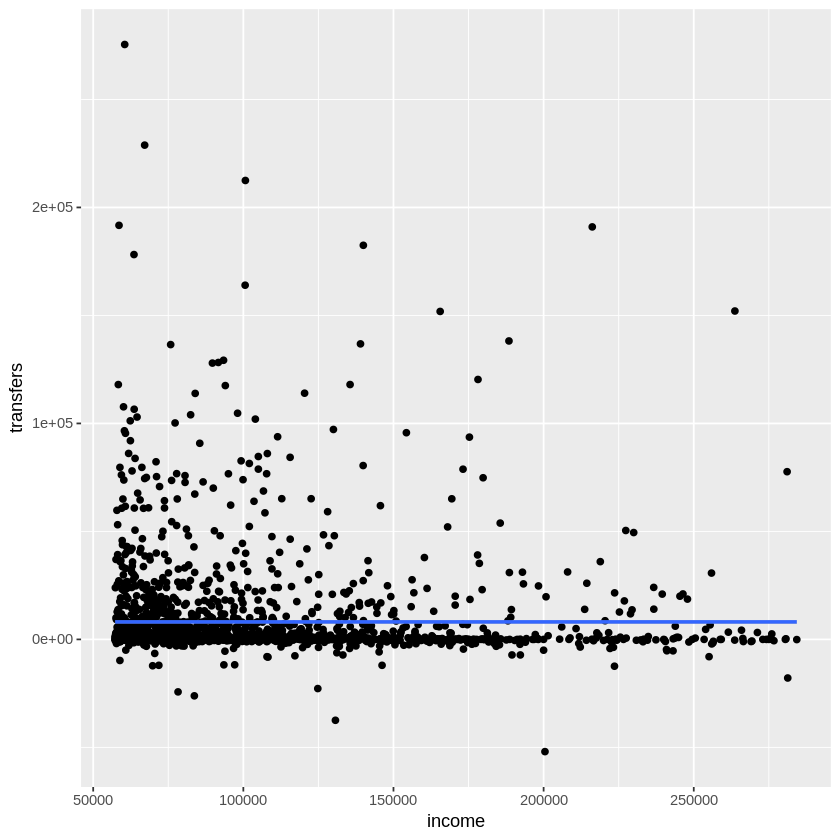

In [62]:
data_section <- subset(Data,income_level==">Q75")
ggplot(data_section,aes(x=income,y=transfers))+geom_point()+geom_smooth()

In [63]:
model6<-lm(formula.model2,data=data_section)
summary(model6)


Call:
lm(formula = formula.model2, data = data_section)

Residuals:
   Min     1Q Median     3Q    Max 
-54148  -7759  -4104    676 266382 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.962e+02  3.907e+03   0.101  0.91925    
income           -3.359e-03  1.034e-02  -0.325  0.74528    
primary          -2.871e+02  2.173e+03  -0.132  0.89491    
somesecondary    -2.314e+03  2.341e+03  -0.988  0.32308    
secondary         2.025e+03  2.011e+03   1.007  0.31425    
someuniversity    5.307e+03  2.062e+03   2.573  0.01015 *  
university        5.515e+03  1.990e+03   2.771  0.00564 ** 
age               1.402e+01  4.530e+01   0.310  0.75691    
female            1.648e+03  2.751e+03   0.599  0.54916    
married           3.503e+02  2.492e+03   0.141  0.88824    
child1            7.423e+02  1.480e+03   0.501  0.61609    
child7           -8.222e+02  5.591e+02  -1.471  0.14154    
child15          -3.227e+02  4.442e+02  -0.727  0.46761    
size

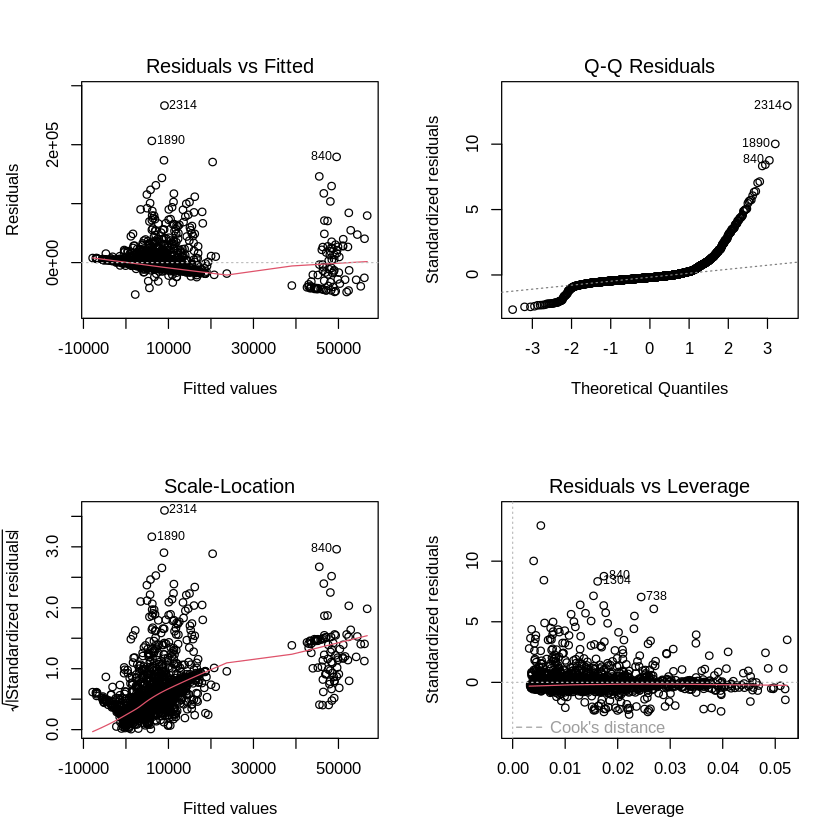

In [64]:
par(mfrow=c(2,2))
plot(model6)

Specify polynomial regression

In [66]:
#below Q25 lowest income
ddata_section <- subset(Data,income_level=="Q25")
formula_poly_model <- as.formula(paste("transfers","~",paste(c(paste0("poly(",Treatment,", 5 , raw=TRUE)"),Ws),collapse="+"),paste0("+ factor(",dummies,")"),sep=""))
model_poly <- lm(formula_poly_model,data=data_section)
summary(model_poly)


Call:
lm(formula = formula_poly_model, data = data_section)

Residuals:
   Min     1Q Median     3Q    Max 
-55378  -5876  -1000   2527 216096 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.759e+04  3.851e+03   4.569 5.20e-06 ***
poly(income, 5, raw = TRUE)1 -7.907e+00  2.885e+00  -2.741 0.006177 ** 
poly(income, 5, raw = TRUE)2  2.066e-03  8.225e-04   2.511 0.012108 *  
poly(income, 5, raw = TRUE)3 -2.267e-07  9.796e-08  -2.314 0.020754 *  
poly(income, 5, raw = TRUE)4  1.090e-11  5.148e-12   2.118 0.034294 *  
poly(income, 5, raw = TRUE)5 -1.919e-16  9.869e-17  -1.945 0.051911 .  
primary                       9.381e+02  9.858e+02   0.952 0.341430    
somesecondary                 1.118e+03  1.132e+03   0.988 0.323204    
secondary                     2.284e+03  1.133e+03   2.016 0.043944 *  
someuniversity                8.721e+03  1.368e+03   6.377 2.21e-10 ***
university                    1.037e+04  1.848e+

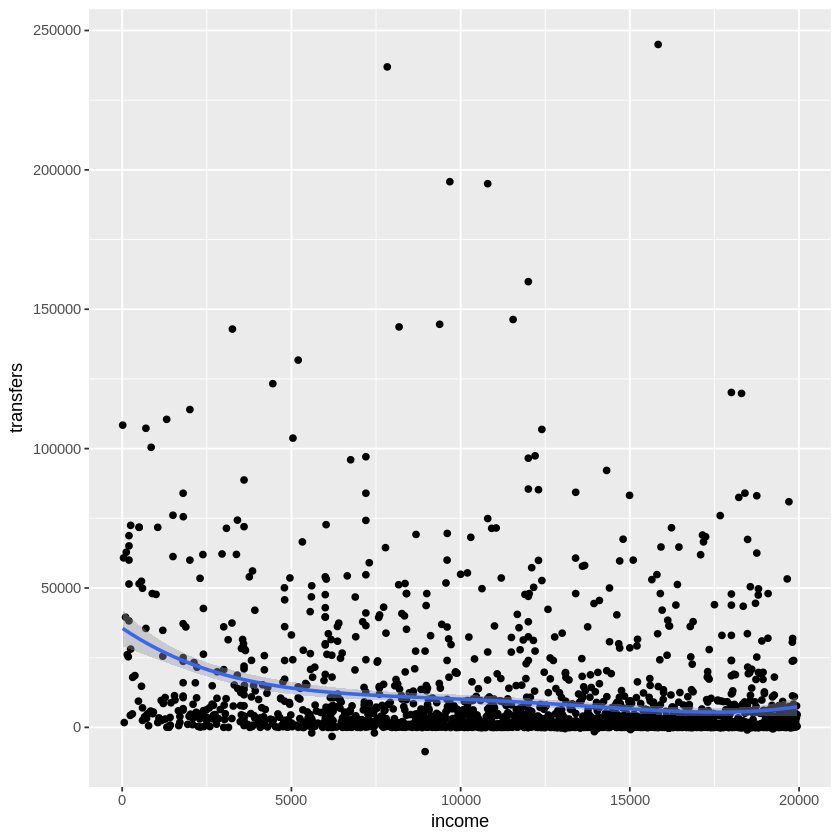

In [67]:
#plot the model
ggplot(data_section, aes(x=income,y=transfers)) + geom_point() + stat_smooth(method='lm', formula = y~ poly(x,4)  )

In [68]:
#how does this change if we do this for the entire sample
model_poly <- lm(formula_poly_model,data=Data)
summary(model_poly)


Call:
lm(formula = formula_poly_model, data = Data)

Residuals:
   Min     1Q Median     3Q    Max 
-54319  -5839  -2256   1383 471806 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   9.793e+03  1.550e+03   6.316 2.81e-10 ***
poly(income, 5, raw = TRUE)1 -5.464e-01  7.526e-02  -7.260 4.20e-13 ***
poly(income, 5, raw = TRUE)2  1.061e-05  2.022e-06   5.249 1.57e-07 ***
poly(income, 5, raw = TRUE)3 -9.050e-11  2.192e-11  -4.128 3.69e-05 ***
poly(income, 5, raw = TRUE)4  3.456e-16  1.001e-16   3.453 0.000558 ***
poly(income, 5, raw = TRUE)5 -4.831e-22  1.603e-22  -3.014 0.002584 ** 
primary                       8.182e+02  6.340e+02   1.291 0.196875    
somesecondary                 5.130e+02  7.177e+02   0.715 0.474805    
secondary                     3.292e+03  6.492e+02   5.071 4.03e-07 ***
someuniversity                6.378e+03  7.246e+02   8.801  < 2e-16 ***
university                    7.091e+03  7.568e+02   9.3

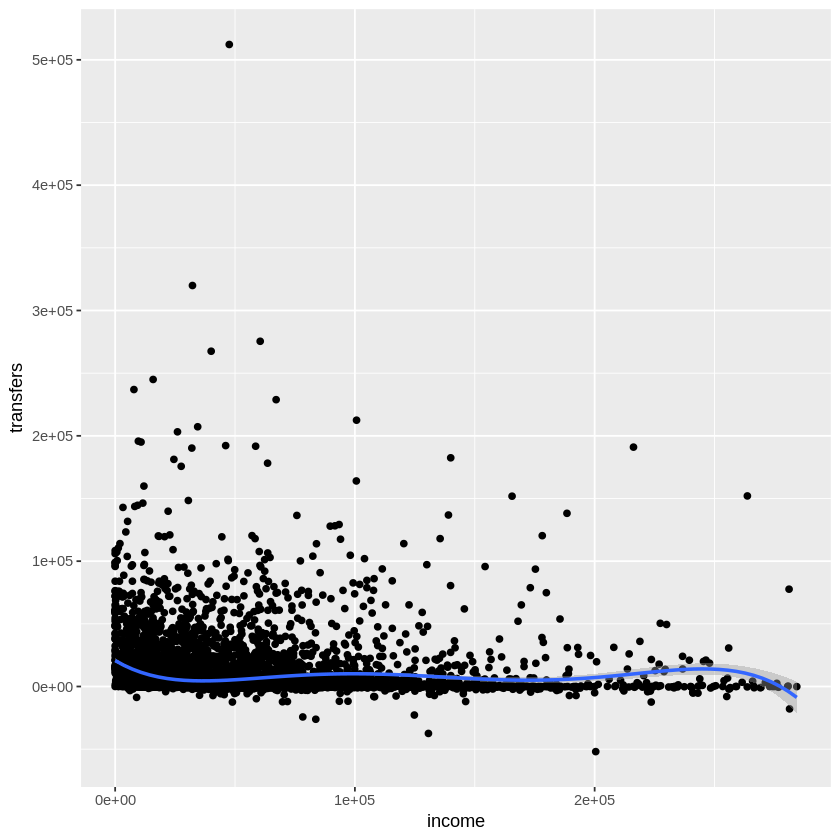

In [69]:
ggplot(Data, aes(x=income,y=transfers)) + geom_point() + stat_smooth(method='lm', formula = y~ poly(x,5)  )


A Real-World Example for Heteroskedasticity

Think about the economic value of education

In [73]:
# load package and attach data
File<-"https://raw.githubusercontent.com/emolinaperez/econometrics_mek/main/Week%204/data/CPSSWEducation.csv"
CPSSWEducation <-read.csv(File)
attach(CPSSWEducation)

In [74]:
# get an overview
summary(CPSSWEducation)

      age          gender             earnings        education    
 Min.   :29.0   Length:2950        Min.   : 2.137   Min.   : 6.00  
 1st Qu.:29.0   Class :character   1st Qu.:10.577   1st Qu.:12.00  
 Median :29.0   Mode  :character   Median :14.615   Median :13.00  
 Mean   :29.5                      Mean   :16.743   Mean   :13.55  
 3rd Qu.:30.0                      3rd Qu.:20.192   3rd Qu.:16.00  
 Max.   :30.0                      Max.   :97.500   Max.   :18.00  

In [75]:
# estimate a simple regression model
labor_model <- lm(earnings ~ education)

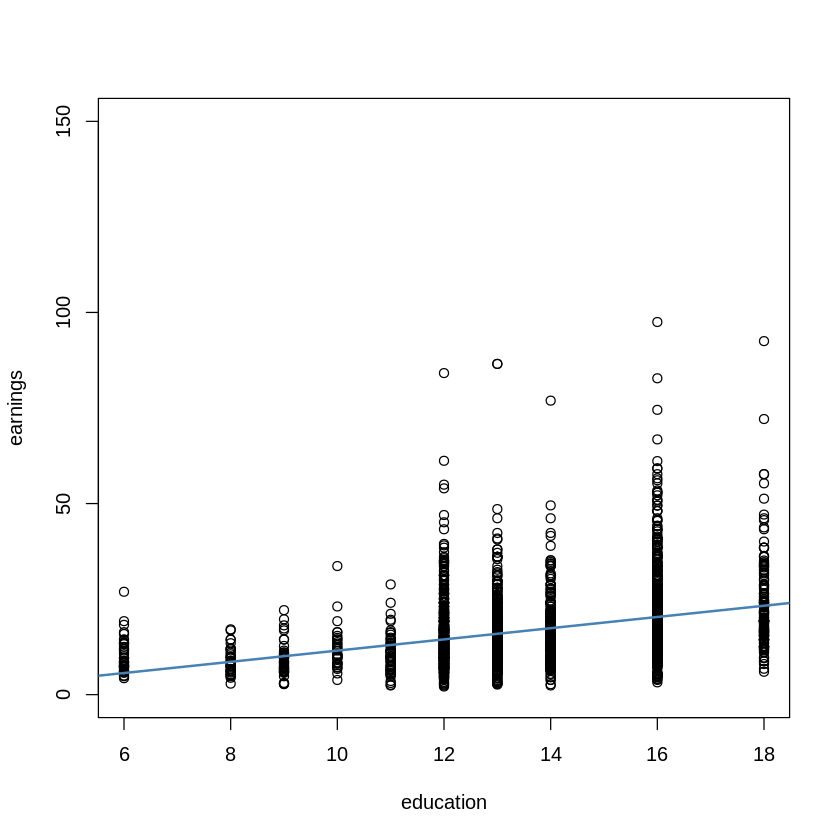

In [76]:
# plot observations and add the regression line
plot(education,
     earnings,
     ylim = c(0, 150))

abline(labor_model,
       col = "steelblue",
       lwd = 2)

In [77]:
# print the contents of labor_model to the console
labor_model


Call:
lm(formula = earnings ~ education)

Coefficients:
(Intercept)    education  
     -3.134        1.467  


In [78]:
# compute a 95% confidence interval for the coefficients in the model
confint(labor_model)

,2.5 %,97.5 %
(Intercept),-5.015248,-1.253495
education,1.330098,1.603753


Since the interval does contain zero we can reject the hypothesis that the coefficient on education is zero at the 5% level.

Is R estimating homokestaic or heterokestatic CIs?

In [79]:
# Store model summary in 'model'
model <- summary(labor_model)

In [80]:
# Extract the standard error of the regression from model summary
SER <- model$sigma

In [81]:
# Compute the variation in 'education'
V <- (nrow(CPSSWEducation)-1) * var(education)

In [84]:
# Compute the standard error of the slope parameter's estimator and print it
SE.beta_1.hat <- sqrt(SER^2/V)
SE.beta_1.hat

[1] 0.06978281

Use logical operators to see if the value computed by hand matches the one provided in mod$coefficients. Round estimates to four decimal places


In [83]:
round(model$coefficients[2, 2], 4) == round(SE.beta_1.hat, 4)

[1] TRUE

Thus summary() estimates the homoskedasticity-only standard error
This issue may invalidate inference when using the previously treated tools for hypothesis testing
we should be cautious when making statements about the significance of regression coefficients on the basis of
statistics as computed by summary() or confidence intervals produced by
confint() if it is doubtful for the assumption of homoskedasticity to hold!

In [86]:
# compute heteroskedasticity-robust standard errors
p_load('sandwich')
vcov <- vcovHC(labor_model, type = "HC1") # HC1 uses the same corrrection as in stata
vcov

,(Intercept),education
(Intercept),0.85726285,-0.06573674
education,-0.06573674,0.00517569


The output of `vcovHC()` is the variance-covariance matrix of coefficient estimates. We are interested in the square root of the diagonal elements of this matrix, i.e., the standard error estimates

In [87]:
# compute the square root of the diagonal elements in vcov
robust_se <- sqrt(diag(vcov))
robust_se

(Intercept)   education 
 0.92588490  0.07194227

Now assume we want to generate a coefficient summary as provided by `summary()` but with robust standard errors of the coefficient estimators, robust statistics and corresponding values for the regression model linear_model. This can be done using `coeftest()` from the package lmtest, see ?coeftest. Further we specify in the argument vcov. that vcov, the Eicker-Huber-White estimate should be used.


In [92]:
# we invoke the function `coeftest()` on our model
p_load('lmtest')
coeftest(labor_model, vcov. = vcov)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -3.134371   0.925885 -3.3853 0.0007204 ***
education    1.466925   0.071942 20.3903 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


We see that the values reported in the column Std. Error are equal those from `sqrt(diag(vcov))`.


How severe are the implications of using homoskedasticity-only standard errors in the presence of heteroskedasticity?

The answer is: it depends. As mentioned above we face the risk of drawing wrong conclusions when conducting significance tests.


In [93]:
# generate heteroskedastic data
set.seed(905)

X <- 1:500
Y <- rnorm(n = 500, mean = X, sd = 0.6 * X)

In [95]:
# estimate a simple regression model
reg <- lm(Y ~ X)
summary(reg)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-607.07  -89.42    6.70   79.99  833.06 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.35627   16.18489  -1.443     0.15    
X             1.11104    0.05598  19.846   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.7 on 498 degrees of freedom
Multiple R-squared:  0.4416,	Adjusted R-squared:  0.4405 
F-statistic: 393.9 on 1 and 498 DF,  p-value: < 2.2e-16


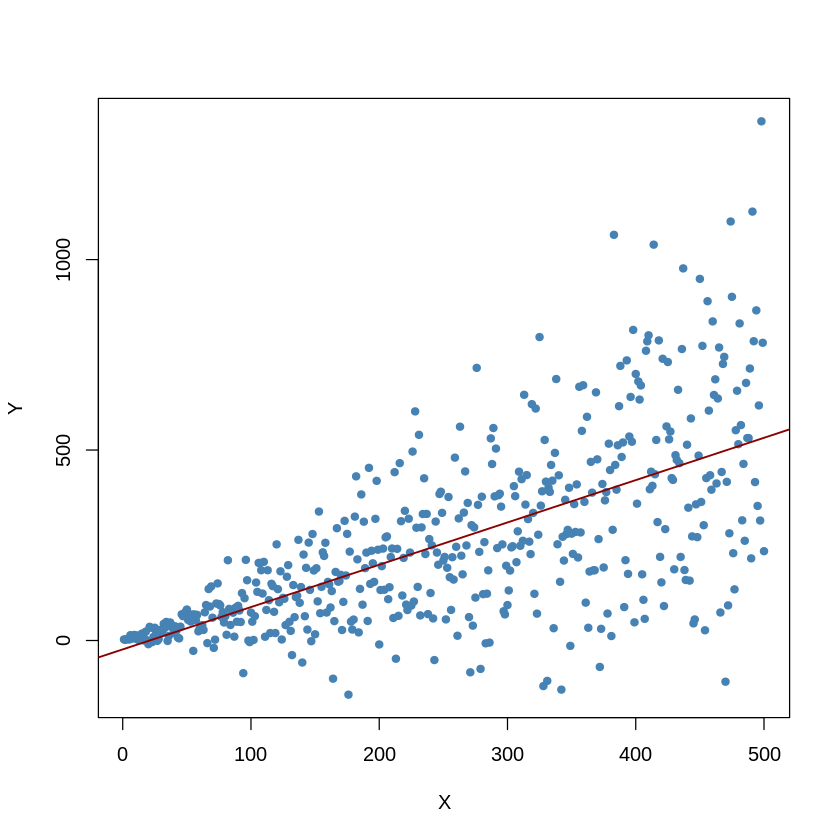

In [96]:
# plot the data
plot(x = X, y = Y,
     pch = 19,
     col = "steelblue",
     cex = 0.8)

# add the regression line to the plot
abline(reg,
       col = "darkred",
       lwd = 1.5)

In [110]:
# test hypthesis using the default standard error formula

# Step 1: Extract coefficient and default covariance matrix
coef_X <- coef(reg)["X"]
var_default <- vcov(reg)["X", "X"]  # Homoscedastic covariance

# Step 2: Compute t-statistic and F-statistic
t_stat <- (coef_X - 1) / sqrt(var_default)  # H0: X = 1
f_stat <- t_stat^2  # F = t^2 (for 1 degree of freedom)

# Step 3: Compute p-value (F-distribution)
p_value <- pf(f_stat, df1 = 1, df2 = df.residual(reg), lower.tail = FALSE)

# Step 4: Assign significance codes
signif_code <- if (p_value <= 0.001) "***" else
               if (p_value <= 0.01)  "**"  else
               if (p_value <= 0.05)  "*"   else
               if (p_value <= 0.1)   "."   else " "

# Step 5: Print results with stars and legend
cat(
  "Linear Hypothesis Test (Classical F-Test)\n",
  "F =", round(f_stat, 4), "\n",
  "Pr(>F) =", round(p_value, 5), signif_code, "\n",
  "Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1\n"
)
#linearHypothesis(reg, hypothesis.matrix = "X = 1")$'Pr(>F)'[2] < 0.05

Linear Hypothesis Test (Classical F-Test)
 F = 3.9346 
 Pr(>F) = 0.04785 * 
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [112]:
# test hypothesis using the robust standard error formula

# Step 1: Extract coefficient and robust covariance matrix (HC1)
coef_X <- coef(reg)["X"]
var_robust <- vcovHC(reg, type = "HC1")["X", "X"]  # Robust covariance

# Step 2: Compute t-statistic and F-statistic (using robust SEs)
t_stat_robust <- (coef_X - 1) / sqrt(var_robust)  # H0: X = 1
f_stat_robust <- t_stat_robust^2  # F = t^2 (for 1 degree of freedom)

# Step 3: Compute p-value (F-distribution)
p_value_robust <- pf(f_stat_robust, df1 = 1, df2 = df.residual(reg), lower.tail = FALSE)

# Step 4: Assign significance codes
signif_code_robust <- if (p_value_robust <= 0.001) "***" else
                      if (p_value_robust <= 0.01)  "**"  else
                      if (p_value_robust <= 0.05)  "*"   else
                      if (p_value_robust <= 0.1)   "."   else " "

# Step 5: Print results with stars and legend
cat(
  "Linear Hypothesis Test (Robust F-Test)\n",
  "F =", round(f_stat_robust, 4), "\n",
  "Pr(>F) =", round(p_value_robust, 5), signif_code_robust, "\n",
  "Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1\n"
)
#linearHypothesis(reg, hypothesis.matrix = "X = 1", white.adjust = "hc1")$'Pr(>F)'[2] < 0.05

Linear Hypothesis Test (Robust F-Test)
 F = 3.2936 
 Pr(>F) = 0.07015 . 
 Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


#how bad is this error?

In [115]:
# initialize vectors t and t.rob
p_load(car)
t <- c()
t.rob <- c()

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’



car installed



In [116]:
# loop sampling and estimation
for (i in 1:10000) {

  # sample data
  X <- 1:1000
  Y <- rnorm(n = 1000, mean = X, sd = 0.6 * X)

  # estimate regression model
  reg <- lm(Y ~ X)

  # homoskedasdicity-only significance test
  t[i] <- linearHypothesis(reg, "X = 1")$'Pr(>F)'[2] < 0.05

  # robust significance test
  t.rob[i] <- linearHypothesis(reg, "X = 1", white.adjust = "hc1")$'Pr(>F)'[2] < 0.05

}

In [117]:
# compute the fraction of false rejections
round(cbind(t = mean(t), t.rob = mean(t.rob)), 3)

t,t.rob
0.074,0.051


These results reveal the increased risk of falsely rejecting the null using the homoskedasticity-only standard error for the testing problem at hand: with the common standard error, 7.3% of all tests falsely reject the null hypothesis. In contrast, with the robust test statistic we are closer to the nominal level of 5%
